In [1]:
## Importando o necessário
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkplt
import bokeh.io as bkio
import bokeh.layouts as bklt
import bokeh.models as bkmdl
import bokeh.palettes as palette

## Definindo URLs necessárias
componentes_url = 'http://bit.do/componentes-curriculares'
componentes_disc_url = 'http://bit.ly/2yIvZLs' #'http://bit.do/componentes_curriculares_presenciais'
turmas_url = [('http://bit.do/turmas_20' + str(13+i) + '_1') for i in range(5)]
turmas_url = turmas_url + [('http://bit.do/turmas_20' + str(13+i) + '_2') for i in range(5)]
mat_comp_url = [('http://bit.do/mat_comp_20' + str(13+i) + '_1') for i in range(5)]
mat_comp_url = mat_comp_url + [('http://bit.do/mat_comp_20' + str(13+i) + '_2') for i in range(5)]
turmas_periodo = [('20' + str(13+i) + '.1') for i in range(5)]
turmas_periodo = turmas_periodo + [('20' + str(13+i) + '.2') for i in range(5)]

In [2]:
componentes = pd.read_csv(componentes_url,';')
componentes.head(2)

,id_curso,nome,id_coordenador,coordenador,situacao_curso,nivel_ensino,grau_academico,modalidade_educacao,area_conhecimento,tipo_oferta,...,municipio,campus,id_unidade_responsavel,unidade_responsavel,website,data_funcionamento,codigo_inep,dou,portaria_reconhecimento,convenio_academico
0,2000004,ADMINISTRAÇÃO,NaN,NaN,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,CURRAIS NOVOS,Campus Currais Novos,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,NaN,1978-09-15,12355.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN
1,2000002,ADMINISTRAÇÃO,24344.0,CARLOS ALBERTO FREIRE MEDEIROS,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,NATAL,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,http://sol.ccsa.ufrn.br/ccsa/areas/adm/adminis...,1971-09-16,12311.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN


In [3]:
disciplinas = pd.read_csv(componentes_disc_url,';')
disciplinas.head(2)

,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
0,18642,DISCIPLINA,MUT721,T,LABORATÓRIOS ELETIVOS,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
1,18643,DISCIPLINA,MUT508,T,COMPOSIÇÃO EM MÚSICA POPULAR III,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN


In [4]:
## Filtrando apenas o componente BTI
imd = disciplinas[disciplinas['codigo'].str.contains("IMD")]
imd.head(2)

,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
17834,51954,MODULO,IMD0001,L,INOVAÇÃO TECNOLÓGICA,INSTITUTO METROPOLE DIGITAL,15,0,0,15,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE
18093,52247,MODULO,IMD0002,L,INOVAÇÃO TECNOLÓGICA,INSTITUTO METROPOLE DIGITAL,30,0,0,30,...,Conceito de inovação. Tipos de inovação. Relaç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE


In [5]:
## Fazendo Download dos CSVs das turmas
turmas_dfs = []
for url in turmas_url:
    print(url)
    turmas_dfs.append(pd.read_csv(url,';'))

http://bit.do/turmas_2013_1
http://bit.do/turmas_2014_1
http://bit.do/turmas_2015_1
http://bit.do/turmas_2016_1
http://bit.do/turmas_2017_1
http://bit.do/turmas_2013_2
http://bit.do/turmas_2014_2
http://bit.do/turmas_2015_2
http://bit.do/turmas_2016_2
http://bit.do/turmas_2017_2


In [6]:
## Fazendo Download dos CSVs das matriculas em componente curricular
mat_comp_dfs = []
for url in mat_comp_url:
    print(url)
    mat_comp_dfs.append(pd.read_csv(url,';'))

http://bit.do/mat_comp_2013_1
http://bit.do/mat_comp_2014_1
http://bit.do/mat_comp_2015_1
http://bit.do/mat_comp_2016_1
http://bit.do/mat_comp_2017_1
http://bit.do/mat_comp_2013_2
http://bit.do/mat_comp_2014_2
http://bit.do/mat_comp_2015_2
http://bit.do/mat_comp_2016_2
http://bit.do/mat_comp_2017_2


In [7]:
print(disciplinas.columns)
disciplinas.head()

Index(['id_componente', 'tipo_componente', 'codigo', 'nivel', 'nome',
       'unidade_responsavel', 'ch_teorico', 'ch_pratico', 'ch_estagio',
       'ch_total', 'ch_dedicada_docente', 'ch_ead', 'cr_max_ead',
       'permite_horario_flexivel', 'qtd_unidades', 'procedimentos_avaliacao',
       'equivalencia', 'pre_requisito', 'co_requisito', 'ementa',
       'bibliografia', 'objetivos', 'conteudo', 'competencias_habilidades',
       'referencias', 'ano_programa', 'periodo_programa', 'modalidade',
       'curso_componente'],
      dtype='object')


,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
0,18642,DISCIPLINA,MUT721,T,LABORATÓRIOS ELETIVOS,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
1,18643,DISCIPLINA,MUT508,T,COMPOSIÇÃO EM MÚSICA POPULAR III,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
2,18644,DISCIPLINA,MUT516,T,CO-REPETIÇÃO,ESCOLA DE MÚSICA,30,0,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
3,18645,DISCIPLINA,MUT520,T,CONTRABAIXO ACÚSTICO I,ESCOLA DE MÚSICA,30,0,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
4,18646,DISCIPLINA,MUT165,T,PIANO COMPLEMENTAR I,ESCOLA DE MÚSICA,15,0,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN


In [8]:
## Facilitando a visualização do dataframe diminuindo o número das colunas
disc_cols = ['id_componente', 'tipo_componente', 'codigo', 'nivel', 'nome',
             'ch_total', 'ano_programa', 'periodo_programa', 'modalidade', 'curso_componente']
disciplinas = disciplinas[disc_cols]
disciplinas_bti = disciplinas[disciplinas['curso_componente'] == 'TECNOLOGIA DA INFORMAÇÃO']
disciplinas_bti.reset_index(inplace=True,drop='index')
disciplinas_bti.head()

,id_componente,tipo_componente,codigo,nivel,nome,ch_total,ano_programa,periodo_programa,modalidade,curso_componente
0,52535,MODULO,IMD0015,G,TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE,30,2013.0,1.0,Presencial,TECNOLOGIA DA INFORMAÇÃO
1,52536,BLOCO,IMD0011,G,CIRCUITOS LÓGICOS,90,NaN,NaN,Presencial,TECNOLOGIA DA INFORMAÇÃO
2,52650,BLOCO,IMD0012,G,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,90,NaN,NaN,Presencial,TECNOLOGIA DA INFORMAÇÃO
3,52653,MODULO,IMD0013,G,ELEMENTOS DE MATEMÁTICA PARA COMPUTAÇÃO,90,2013.0,1.0,Presencial,TECNOLOGIA DA INFORMAÇÃO
4,52656,MODULO,IMD0014,G,INTRODUÇÃO AO CÁLCULO,60,2013.0,1.0,Presencial,TECNOLOGIA DA INFORMAÇÃO


In [9]:
## Fazendo a concatenação para trabalhar apenas com um DataFrame
turmas_df = pd.concat(turmas_dfs, keys=turmas_periodo)
## Filtrando o DataFrame para otimizar as buscas
turmas_df = turmas_df[turmas_df['nivel_ensino'] == 'GRADUAÇÃO']
turmas_df = turmas_df[turmas_df['modalidade_participantes'] == 'Presencial']
turmas_df = turmas_df[turmas_df['campus_turma'] == 'Campus Central']
turmas_df.reset_index(inplace=True,level=0)
turmas_df.reset_index(inplace=True,drop='index')
turmas_df['ano_periodo'] = turmas_df.level_0
print(turmas_df.columns)

Index(['level_0', 'id_turma', 'codigo_turma', 'id_docente_interno',
       'id_docente_externo', 'observacao', 'id_componente_curricular',
       'nivel_ensino', 'campus_turma', 'local', 'ano', 'periodo',
       'data_inicio', 'data_fim', 'descricao_horario', 'total_solicitacoes',
       'capacidade_aluno', 'tipo', 'distancia', 'data_consolidacao',
       'agrupadora', 'id_turma_agrupadora', 'qtd_aulas_lancadas',
       'situacao_turma', 'convenio', 'modalidade_participantes', 'Unnamed: 25',
       'ano_periodo'],
      dtype='object')


In [10]:
## Facilitando a visualização do dataframe diminuindo o número das colunas
colunas_turma = ['id_turma', 'codigo_turma', 'id_docente_interno', 'id_docente_externo', 'id_componente_curricular',
                 'ano_periodo', 'descricao_horario', 'tipo', 'situacao_turma']
turmas_df = turmas_df[colunas_turma]
turmas_df.reset_index(inplace=True,drop='index')
turmas_df.head()

,id_turma,codigo_turma,id_docente_interno,id_docente_externo,id_componente_curricular,ano_periodo,descricao_horario,tipo,situacao_turma
0,1196784,01,26322,NaN,46397.0,2013.1,5T3456,REGULAR,CONSOLIDADA
1,1196812,01,5.75559e+06,NaN,25562.0,2013.1,5M456,REGULAR,CONSOLIDADA
2,1196813,02,5.75428e+06,NaN,25562.0,2013.1,3T123,REGULAR,CONSOLIDADA
3,1196813,02,5.75405e+06,NaN,25562.0,2013.1,3T123,REGULAR,CONSOLIDADA
4,1196814,03,5.75509e+06,NaN,25562.0,2013.1,6T123,REGULAR,CONSOLIDADA


In [11]:
## Fazendo a concatenação para trabalhar com apenas um DataFrame
mat_comp_df = pd.concat(mat_comp_dfs, keys=turmas_periodo)
mat_comp_df.reset_index(inplace=True,level=0)
mat_comp_df.reset_index(inplace=True,drop='index')
mat_comp_df['ano_periodo'] = mat_comp_df.level_0
print(mat_comp_df.columns)

Index(['level_0', 'Unnamed: 10', 'descricao', 'discente', 'faltas_unidade',
       'id_curso', 'id_turma', 'media_final', 'nota', 'numero_total_faltas',
       'reposicao', 'unidade', 'ano_periodo'],
      dtype='object')


In [12]:
## Filtrando apenas o componente BTI
bti = componentes[componentes['nome'] == 'TECNOLOGIA DA INFORMAÇÃO']
bti.reset_index(drop='index',inplace=True)
bti.head()

,id_curso,nome,id_coordenador,coordenador,situacao_curso,nivel_ensino,grau_academico,modalidade_educacao,area_conhecimento,tipo_oferta,...,municipio,campus,id_unidade_responsavel,unidade_responsavel,website,data_funcionamento,codigo_inep,dou,portaria_reconhecimento,convenio_academico
0,92127264,TECNOLOGIA DA INFORMAÇÃO,5756802.0,GUSTAVO GIRAO BARRETO DA SILVA,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Exatas e da Terra,Regular,...,NATAL,NaN,6069,INSTITUTO METROPOLE DIGITAL,NaN,NaN,1190414.0,2016-05-02,Portaria nº 127/2016 - MEC,NaN


In [13]:
## Filtrando pelo id do bti
mat_comp_bti = mat_comp_df[mat_comp_df['id_curso'] == bti['id_curso'][0]]
## Limpando DataFrame
colunas_mat_comp_bti = ['id_turma', 'descricao', 'discente', 'media_final',
                        'nota', 'reposicao', 'unidade', 'ano_periodo']
mat_comp_bti = mat_comp_bti[colunas_mat_comp_bti]
mat_comp_bti.reset_index(inplace=True,drop='index')
mat_comp_bti.head()

,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
0,1203381,TRANCADO,da437177e090ab90ea33ba772cfbae03,NaN,2.6,f,1.0,2013.1
1,1203381,TRANCADO,da437177e090ab90ea33ba772cfbae03,NaN,NaN,f,2.0,2013.1
2,1203381,TRANCADO,da437177e090ab90ea33ba772cfbae03,NaN,NaN,f,3.0,2013.1
3,1203381,APROVADO,59d9aee9a3b15f0b735e28fe4a692a8e,7.0,7.1,f,1.0,2013.1
4,1203381,APROVADO,59d9aee9a3b15f0b735e28fe4a692a8e,7.0,6.0,f,2.0,2013.1


In [14]:
## Filtrando as disciplinas de LP II
lp2 = disciplinas_bti[disciplinas_bti['nome'] == 'LINGUAGEM DE PROGRAMAÇÃO II']
lp2

,id_componente,tipo_componente,codigo,nivel,nome,ch_total,ano_programa,periodo_programa,modalidade,curso_componente
77,55027,MODULO,IMD0040,G,LINGUAGEM DE PROGRAMAÇÃO II,60,2017.0,1.0,Presencial,TECNOLOGIA DA INFORMAÇÃO


In [17]:
turmas_lp2 = []
for cod in lp2['id_componente'].unique():
    turmas_lp2.append(turmas_df[turmas_df['id_componente_curricular'] == cod])
turmas_lp2 = pd.concat(turmas_lp2, keys=lp2['id_componente'].unique())
turmas_lp2.reset_index(inplace=True,level=0)
turmas_lp2.reset_index(inplace=True,drop='index')
turmas_lp2.head(2)

,level_0,id_turma,codigo_turma,id_docente_interno,id_docente_externo,id_componente_curricular,ano_periodo,descricao_horario,tipo,situacao_turma
0,55027,1239420,01,5.75511e+06,NaN,55027.0,2015.1,24M56 (02/02/2015 - 20/06/2015),REGULAR,CONSOLIDADA
1,55027,1239421,02,5.75511e+06,NaN,55027.0,2015.1,24M56 (02/02/2015 - 20/06/2015),REGULAR,EXCLUÍDA


In [41]:
## Capturando os alunos de LP II
alunos_lp2 = []
for cod in turmas_lp2['id_turma'].unique():
    alunos_lp2.append(mat_comp_bti[mat_comp_bti['id_turma'] == np.int64(cod)])
alunos_lp2 = pd.concat(alunos_lp2, keys=turmas_lp2['id_turma'].unique())
alunos_lp2.reset_index(inplace=True,level=0)
alunos_lp2.reset_index(inplace=True,drop='index')
alunos_lp2.head(10)

,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
0,1239420,1239420,EXCLUIDA,8d2a3b00a41279debf258bc6c6305205,NaN,NaN,NaN,NaN,2015.1
1,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,6.9,f,1.0,2015.1
2,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,2.8,t,2.0,2015.1
3,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,9.3,f,3.0,2015.1
4,1239420,1239420,REPROVADO POR MÉDIA E POR FALTAS,617302e28daaf9ab54aaae256040ba3f,2.8,5.7,f,1.0,2015.1
5,1239420,1239420,REPROVADO POR MÉDIA E POR FALTAS,617302e28daaf9ab54aaae256040ba3f,2.8,2.7,f,2.0,2015.1
6,1239420,1239420,REPROVADO POR MÉDIA E POR FALTAS,617302e28daaf9ab54aaae256040ba3f,2.8,0.0,f,3.0,2015.1
7,1239420,1239420,APROVADO POR NOTA,abaac7a4a42d03417f81b1455442607a,6.3,4.5,f,1.0,2015.1
8,1239420,1239420,APROVADO POR NOTA,abaac7a4a42d03417f81b1455442607a,6.3,6.5,f,2.0,2015.1
9,1239420,1239420,APROVADO POR NOTA,abaac7a4a42d03417f81b1455442607a,6.3,7.9,f,3.0,2015.1


In [44]:
alunos_lp2['descricao'].unique()

array(['EXCLUIDA', 'APROVADO POR NOTA', 'REPROVADO POR MÉDIA E POR FALTAS',
       'APROVADO', 'REPROVADO', 'CANCELADO', 'TRANCADO', 'INDEFERIDO',
       'REPROVADO POR NOTA', 'MATRICULADO', 'DESISTENCIA'], dtype=object)

In [50]:
alunos_lp2['ano_periodo'].unique()

array(['2015.1', '2016.1', '2017.1', '2014.2', '2015.2', '2016.2', '2017.2'], dtype=object)

# Alunos que trancaram a disciplina entre 2014.2 e 2017.1

In [68]:
alunos_lp2_trancados = alunos_lp2[alunos_lp2['descricao'].str.contains('TRANCADO')]
numero_trancados = len(alunos_lp2_trancados['discente'].unique())
print(numero_trancados)
alunos_lp2_trancados.head()

3


,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
246,57576748,57576748,TRANCADO,61b49c330f8ac0a64a6903ca154740f7,NaN,NaN,f,1.0,2016.1
247,57576748,57576748,TRANCADO,61b49c330f8ac0a64a6903ca154740f7,NaN,NaN,f,2.0,2016.1
248,57576748,57576748,TRANCADO,61b49c330f8ac0a64a6903ca154740f7,NaN,NaN,f,3.0,2016.1
1036,57586401,57586401,TRANCADO,00d23d8801e80f5326f9409bc1edee9b,NaN,NaN,f,1.0,2016.2
1037,57586401,57586401,TRANCADO,00d23d8801e80f5326f9409bc1edee9b,NaN,NaN,f,2.0,2016.2


# Quantidade total de alunos de lp2 que cursaram a disciplina e ainda estão com status ativos

In [72]:
total_alunos = alunos_lp2[alunos_lp2['descricao'].str.contains('APROVADO') | alunos_lp2['descricao'].str.contains('REPROVADO') | alunos_lp2['descricao'].str.contains('MATRICULADO')]
print(len(total_alunos['discente'].unique()))
total_alunos.head(5)

312


,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
1,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,6.9,f,1.0,2015.1
2,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,2.8,t,2.0,2015.1
3,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,9.3,f,3.0,2015.1
4,1239420,1239420,REPROVADO POR MÉDIA E POR FALTAS,617302e28daaf9ab54aaae256040ba3f,2.8,5.7,f,1.0,2015.1
5,1239420,1239420,REPROVADO POR MÉDIA E POR FALTAS,617302e28daaf9ab54aaae256040ba3f,2.8,2.7,f,2.0,2015.1


In [137]:
alunos_matriculados = alunos_lp2[alunos_lp2['descricao'].str.contains('MATRICULADO')]
alunos_matriculados.head()

,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
1165,57608419,57608419,MATRICULADO,400db7a5cac622448fc7c15b3888974c,NaN,NaN,f,3.0,2017.2
1166,57608419,57608419,MATRICULADO,400db7a5cac622448fc7c15b3888974c,NaN,0.0,f,2.0,2017.2
1167,57608419,57608419,MATRICULADO,400db7a5cac622448fc7c15b3888974c,NaN,7.7,f,1.0,2017.2
1168,57608419,57608419,MATRICULADO,dfaa90045bbd3b43baaf84ea749170c0,NaN,NaN,f,3.0,2017.2
1169,57608419,57608419,MATRICULADO,dfaa90045bbd3b43baaf84ea749170c0,NaN,0.0,f,2.0,2017.2


# Alunos das turmas que já foram consolidadas

In [71]:
alunos_ok = alunos_lp2[alunos_lp2['descricao'].str.contains('APROVADO') | alunos_lp2['descricao'].str.contains('REPROVADO')]
print(len(alunos_ok['discente'].unique()))
alunos_ok.head(5)

261


,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
1,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,6.9,f,1.0,2015.1
2,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,2.8,t,2.0,2015.1
3,1239420,1239420,APROVADO POR NOTA,cbe40ea1cb2d08a912937532829ea391,6.6,9.3,f,3.0,2015.1
4,1239420,1239420,REPROVADO POR MÉDIA E POR FALTAS,617302e28daaf9ab54aaae256040ba3f,2.8,5.7,f,1.0,2015.1
5,1239420,1239420,REPROVADO POR MÉDIA E POR FALTAS,617302e28daaf9ab54aaae256040ba3f,2.8,2.7,f,2.0,2015.1


In [98]:
# Separando os alunos por unidade
# Como tem alunos que repetiram a disciplina, temos uma quantidade maior de alunos nas unidades que no geral, pois o discente não está como unico
unidade1 = alunos_ok[alunos_ok['unidade'] == 1.0]
unidade2 = alunos_ok[alunos_ok['unidade'] == 2.0]
unidade3 = alunos_ok[alunos_ok['unidade'] == 3.0]
unidade1.reset_index(drop='index',level=0,inplace=True)
unidade2.reset_index(drop='index',level=0,inplace=True)
unidade3.reset_index(drop='index',level=0,inplace=True)
alunos_lp2_u1_df = unidade1.drop(['level_0','reposicao','unidade'],axis=1)
alunos_lp2_u2_df = unidade2.drop(['level_0','reposicao','unidade'],axis=1)
alunos_lp2_u3_df = unidade3.drop(['level_0','reposicao','unidade'],axis=1)
len(unidade1)
unidade1['descricao'].unique()

array(['APROVADO POR NOTA', 'REPROVADO POR MÉDIA E POR FALTAS', 'APROVADO',
       'REPROVADO', 'REPROVADO POR NOTA'], dtype=object)

# Gráfico para as notas de todas as turmas de lp II

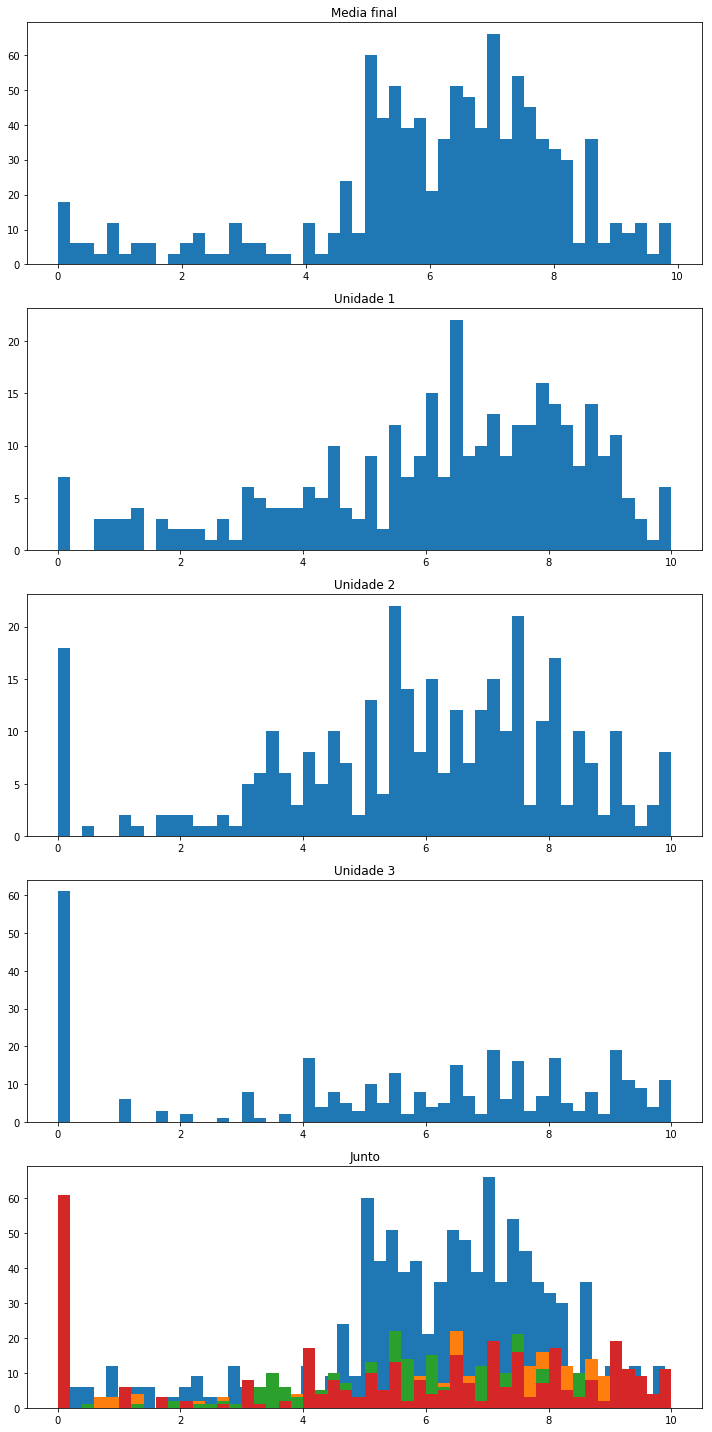

In [246]:
fig,(ax1,ax2,ax3,ax4, ax5) = plt.subplots(5, 1, figsize=(10,20))

ax1.hist(alunos_ok['media_final'], bins=50)
ax1.set_title('Media final')

ax2.hist(alunos_lp2_u1_df['nota'], bins=50)
ax2.set_title('Unidade 1')

ax3.hist(alunos_lp2_u2_df['nota'], bins=50)
ax3.set_title('Unidade 2')

ax4.hist(alunos_lp2_u3_df['nota'], bins=50)
ax4.set_title('Unidade 3')

ax5.hist(alunos_ok['media_final'], bins=50)
ax5.set_title('Junto')
ax5.hist(alunos_lp2_u1_df['nota'], bins=50)
ax5.hist(alunos_lp2_u2_df['nota'], bins=50)
ax5.hist(alunos_lp2_u3_df['nota'], bins=50)
fig.tight_layout()
plt.show()

In [99]:
## Calculando as médias e desvios padrões por unidades
media_lp2 = {'media_geral' : np.mean(alunos_lp2['media_final'].dropna()),
         'media_unidade1' : np.mean(alunos_lp2_u1_df['nota'].dropna()),
         'media_unidade2' : np.mean(alunos_lp2_u2_df['nota'].dropna()),
         'media_unidade3' : np.mean(alunos_lp2_u3_df['nota'].dropna())}
std_lp2 = {'desvio_padrao' : np.std(alunos_lp2['media_final'].dropna()),
       'desvio_padrao_u1' : np.std(alunos_lp2_u1_df['nota'].dropna()),
       'desvio_padrao_u2' : np.std(alunos_lp2_u2_df['nota'].dropna()),
       'desvio_padrao_u3' : np.std(alunos_lp2_u3_df['nota'].dropna())}
mediana_lp2 = {'mediana_geral' : np.median(alunos_lp2['media_final'].dropna()),
         'mediana_unidade1' : np.median(alunos_lp2_u1_df['nota'].dropna()),
         'mediana_unidade2' : np.median(alunos_lp2_u2_df['nota'].dropna()),
         'mediana_unidade3' : np.median(alunos_lp2_u3_df['nota'].dropna())}
medianas_lp2 = pd.DataFrame.from_dict(mediana_lp2,orient='index')
medianas_lp2 = pd.DataFrame.transpose(medianas_lp2);
medias_lp2 = pd.DataFrame.from_dict(media_lp2,orient='index')
stds_lp2 = pd.DataFrame.from_dict(std_lp2,orient='index')
medias_lp2 = pd.DataFrame.transpose(medias_lp2);
stds_lp2 = pd.DataFrame.transpose(stds_lp2);

medias_lp2_df = pd.concat([medianas_lp2,medias_lp2,stds_lp2,],axis=1)
medias_lp2_df = medias_lp2_df.dropna()
medias_lp2_df

,mediana_geral,mediana_unidade1,mediana_unidade2,mediana_unidade3,media_geral,media_unidade1,media_unidade2,media_unidade3,desvio_padrao,desvio_padrao_u1,desvio_padrao_u2,desvio_padrao_u3
0,6.4,6.6,6.2,6.25,5.956897,6.211747,5.893675,5.444277,2.206751,2.341612,2.373268,3.243807


# Alunos lp II 2017.1 total

In [212]:
total_2017_1 = alunos_lp2[alunos_lp2['ano_periodo'] == "2017.1"]
print(len(total_2017_1['discente'].unique()))

59


# Alunos lp II 2017.1 que foram aprovados/reprovados

In [211]:
alunos_2017_1 = alunos_ok[alunos_ok['ano_periodo'] == '2017.1']
print(len(alunos_2017_1['discente'].unique()))
alunos_2017_1.head()

51


,level_0,id_turma,descricao,discente,media_final,nota,reposicao,unidade,ano_periodo
318,57597942,57597942,APROVADO POR NOTA,a2b2ef559d7913f7f419197a1beb2e8c,6.2,0.0,t,3.0,2017.1
319,57597942,57597942,APROVADO POR NOTA,a2b2ef559d7913f7f419197a1beb2e8c,6.2,6.5,f,2.0,2017.1
320,57597942,57597942,APROVADO POR NOTA,a2b2ef559d7913f7f419197a1beb2e8c,6.2,5.0,f,1.0,2017.1
321,57597942,57597942,APROVADO,9e1a702aae6242a8b9ac18d54aa19e24,7.5,9.0,f,3.0,2017.1
322,57597942,57597942,APROVADO,9e1a702aae6242a8b9ac18d54aa19e24,7.5,1.4,t,2.0,2017.1


In [208]:
u1 = alunos_2017_1[alunos_2017_1['unidade'] == 1.0]
u2 = alunos_2017_1[alunos_2017_1['unidade'] == 2.0]
u3 = alunos_2017_1[alunos_2017_1['unidade'] == 3.0]

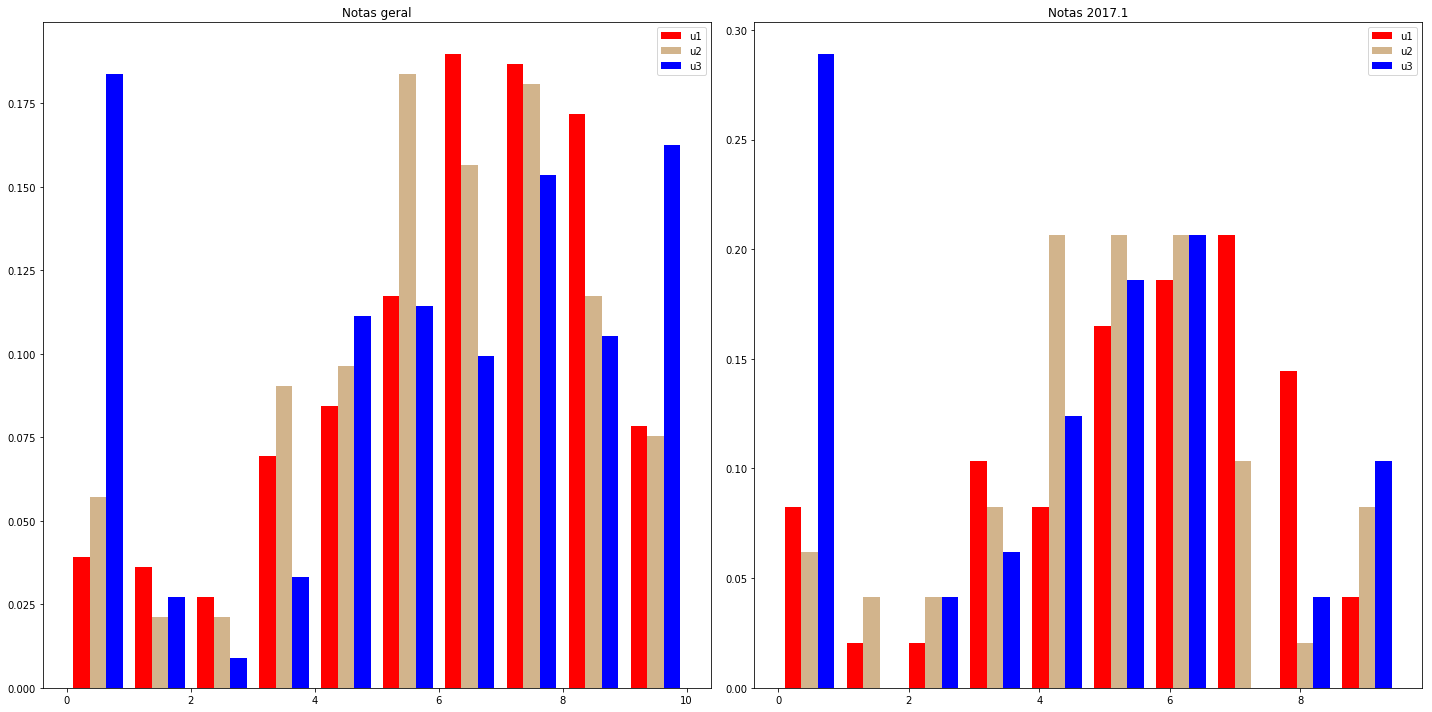

In [210]:
#import numpy as np
#import matplotlib.pyplot as plt

#np.random.seed(19680801)

n_bins = 10
x = alunos_lp2_u1_df['nota'], alunos_lp2_u2_df['nota'],alunos_lp2_u3_df['nota']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax0, ax1 = axes.flatten()

colors = ['red', 'tan','blue']
nomes = ['u1','u2', 'u3']
ax0.hist(x,n_bins, normed=1, histtype='bar', color=colors, label=nomes)
ax0.legend(prop={'size': 10})
ax0.set_title('Notas geral')

x2 = u1['nota'], u2['nota'],u3['nota']
ax1.hist(x2,n_bins, normed=1, histtype='bar', color=colors, label=nomes)
ax1.legend(prop={'size': 10})
ax1.set_title('Notas 2017.1')

fig.tight_layout()
plt.show()

In [154]:
## Calculando as médias e desvios padrões por unidades
media_2017_1 = {'media_geral' : np.mean(alunos_2017_1['media_final'].dropna()),
         'media_unidade1' : np.mean(u1['nota'].dropna()),
         'media_unidade2' : np.mean(u2['nota'].dropna()),
         'media_unidade3' : np.mean(u3['nota'].dropna())}
std_2017_1 = {'desvio_padrao' : np.std(alunos_2017_1['media_final'].dropna()),
       'desvio_padrao_u1' : np.std(u1['nota'].dropna()),
       'desvio_padrao_u2' : np.std(u2['nota'].dropna()),
       'desvio_padrao_u3' : np.std(u3['nota'].dropna())}
mediana_2017_1 = {'mediana_geral' : np.median(alunos_2017_1['media_final'].dropna()),
         'mediana_unidade1' : np.median(u1['nota'].dropna()),
         'mediana_unidade2' : np.median(u2['nota'].dropna()),
         'mediana_unidade3' : np.median(u3['nota'].dropna())}
medianas_2017_1 = pd.DataFrame.from_dict(mediana_2017_1,orient='index')
medianas_2017_1 = pd.DataFrame.transpose(medianas_2017_1);
medias_2017_1 = pd.DataFrame.from_dict(media_2017_1,orient='index')
stds_2017_1 = pd.DataFrame.from_dict(std_2017_1,orient='index')
medias_2017_1 = pd.DataFrame.transpose(medias_2017_1);
stds_2017_1 = pd.DataFrame.transpose(stds_2017_1);

medias_2017_1_df = pd.concat([medianas_2017_1,medias_2017_1,stds_2017_1,],axis=1)
medias_2017_1_df = medias_2017_1_df.dropna()
medias_2017_1_df

,mediana_geral,mediana_unidade1,mediana_unidade2,mediana_unidade3,media_geral,media_unidade1,media_unidade2,media_unidade3,desvio_padrao,desvio_padrao_u1,desvio_padrao_u2,desvio_padrao_u3
0,5.7,6.0,5.1,4.8,5.437255,5.472549,4.988235,4.111765,1.998721,2.347554,2.163661,2.983461


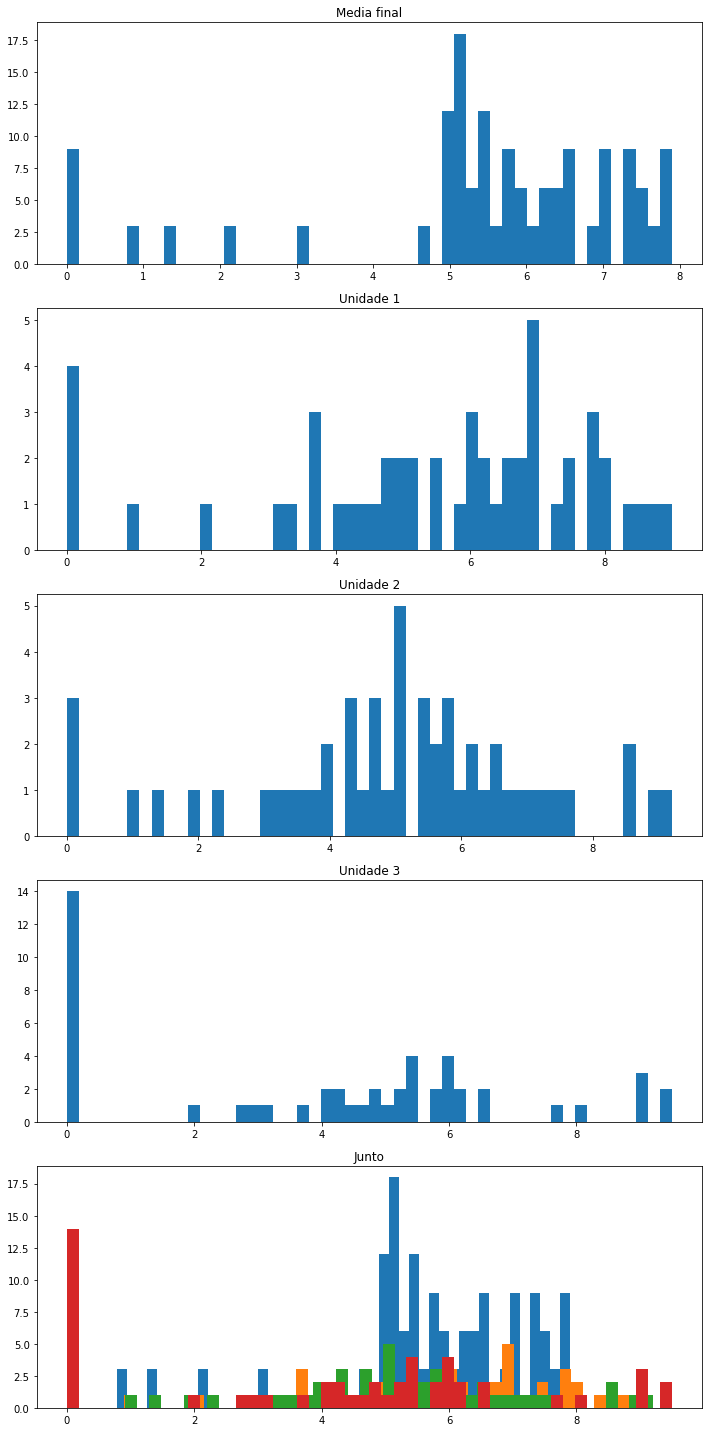

In [247]:
fig,(ax1,ax2,ax3,ax4, ax5) = plt.subplots(5, 1, figsize=(10,20))

ax1.hist(alunos_2017_1['media_final'], bins=50)
ax1.set_title('Media final')

ax2.hist(u1['nota'], bins=50)
ax2.set_title('Unidade 1')

ax3.hist(u2['nota'], bins=50)
ax3.set_title('Unidade 2')

ax4.hist(u3['nota'], bins=50)
ax4.set_title('Unidade 3')

ax5.hist(alunos_2017_1['media_final'], bins=50)
ax5.set_title('Junto')
ax5.hist(u1['nota'], bins=50)
ax5.hist(u2['nota'], bins=50)
ax5.hist(u3['nota'], bins=50)
#plt.hist(alunos_lp2_u1_df['nota'], bins=50)
fig.tight_layout()
plt.show()